# Use ARIMA and SARIMA to Predict Time Series 


Created on Sat Mar 28 20:01:58 2020

@author: Evan Yeoh Boon Khai

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
%matplotlib inline

## Some function

In [2]:
def clean_data(sg_data):
    #change some number data to numeric value 
    cols=['Revenue ESG SnP']
    for column in cols:
        sg_data[column]=sg_data[column].map(lambda x: x.lstrip('($').rstrip(')')) #remove the money sign
        sg_data[column]=pd.to_numeric(sg_data[column])#change to numeric 
    
    return sg_data

def test_stationarity(timeseries):
    #Perform Rolling statics
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    plt.figure(figsize=(10, 3))
    plt.plot(timeseries,color='blue',label='original')
    plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

#==========================================================================================
    #Perform Dickey-Fuller test:
    #If the ‘Test Statistic’ is less than the ‘Critical Value’
    #we can reject the null hypothesis and say that the series is stationary.

    from statsmodels.tsa.stattools import adfuller
    print('Result of Dickey Fuller Test')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


## Data Preparation

In [3]:
#Load data file
sg_data=pd.read_csv(r'C:\Users\Eric Yeoh Seng Ghee\Desktop\Clement data\Singapore 2017Q1-2021Q1.csv')

#Clean some NaN Data
sg_data=sg_data.dropna(axis=0,how='any')

#Convert Data date to year and month 
sg_data['Date']=pd.to_datetime(sg_data['Date'])#convert to string

#create datetimeindex
sg_data=sg_data.set_index('Date')

#Clean the Data
sg_data=clean_data(sg_data)

#Create month and sum matrix data
sg_revenue=sg_data['Revenue ESG SnP'].resample('M').sum()

C:\Users\Eric Yeoh Seng Ghee\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


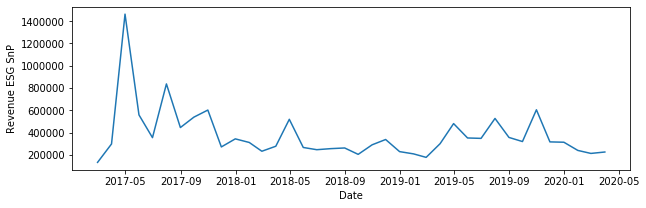

In [4]:
#Data Visualisation
plt.figure(figsize=(10, 3))
plt.xlabel('Date')
plt.ylabel('Revenue ESG SnP')
plt.plot(sg_revenue)




## How to Check Stationarity of a Time Series?
A TS is said to be stationary if its statistical properties
* constat mean
* constant variance 
* an autocovariance that does not depend on time



## Why is it important?

Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can said that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

## Ways to test the stationarity

* Plotting Rolling Statistics: 
We can plot the moving average or moving variance and see if it varies with time(more of a visual technique).

* Dickey-Fuller Test: 
This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. **If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary**. 

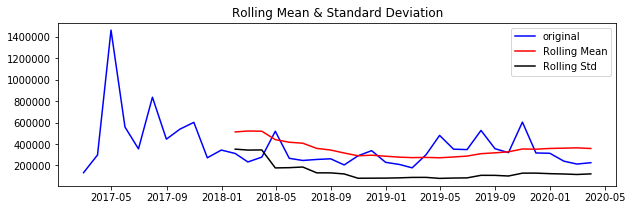

Result of Dickey Fuller Test
Test Statistic                 -4.996528
p-value                         0.000023
#Lags Used                      0.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [5]:
test_stationarity(sg_revenue)

## How to make a Time Series Stationary?
Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationarity of a TS:
1. **Trend** – varying mean over time. 
2. **Seasonality** – variations at specific time-frames.

Eliminate this two to make the TS stationary

## Estimating & Eliminating Trend

### 1.Data Transformation -Eliminate Trend

Data transfromation can be taking a log, square root, cube root, etc.The below are few technique of data transformation.
This project is taking log transfromation.

### 2.Noise Removal
There can be many ways of doing it and some of most commonly used are:

Aggregation – taking average for a time period like monthly/weekly averages
Smoothing – taking rolling averages(moving average)
Polynomial Fitting – fit a regression model


#### 2.1 Moving average
Pandas has specific functions defined for determining rolling statistics.

pd.rolling_mean()

# Data Transformation Technique (Extra)

## Normalization 
1. If the data is on different scales
2. Some algorithms work good in normalize

normalization =(x-min)/(max-min) of the data

Example :
from sklearn.preprocessing import MinMaxScaler

birth_arr=f_birth.value

scaler= MinMaxScaler(feature_range=(0,1))  #param(where ,to where )

scaler =scaler.fit(birth_arr)

birth_normailize=scaler.transform(birth_arr)



### transfrom back (apply to both test and result) make to proper value

birth_forecast_reshape=birth_forecast.reshape(len(birth_forecast),1)

birth_forecas_reverse =scaler.inverse_transform(birth_forecast_reshape)

birth_test_reshape=birth_test.reshape(len(birth_test),1)

birth_test_reverse=scaler.inverse_transform(birth_test_reshape)

#### count the mean square error again

np.sqrt(mean_square_erroro(birth_test_reverse,birth_forecas_reverse))


## Standardization 
1. handle with the outlier 

x-mean /S.D

from sklearn.preprocessing import StandardScaler

std_scaler=StadardScaler()

std_scaler =std_scaler.fit(birth_arr)

std_birth =std_scaler.transform(birth_arr)

### transfrom back (apply to both test and result) make to proper value

std_birth_forecast_reshape=std_birth_forecast.reshape(len(std_birth_forecast),1)

std_birth_forecas_reverse =std_scaler.inverse_transform(std_birth_forecast_reshape)

std_birth_test_reshape=std_birth_test.reshape(len(std_birth_test),1)

std_birth_test_reverse=std_scaler.inverse_transform(std_birth_test_reshape)

np.sqrt(mean_square_erroro(std_birth_test_reverse,std_birth_forecas_reverse))

# Feature Engineer for time series (Extra)

step 1 -use shift lag

    f_birth['lag1']= f_birth['column name'].shift(1)

step 2-moving average (make it smooth)
    f_birth['MA3']=f_birth['column name'].rolling(window=3).mean()

  



### Data Spliting

In [6]:
#log transform
indexedDataset_logScale=np.log(sg_revenue)

In [7]:
#Data spliting # remember to reset the log from upper row 
indexedDataset_logScale_test=indexedDataset_logScale[26::]
indexedDataset_logScale=indexedDataset_logScale[0:26]

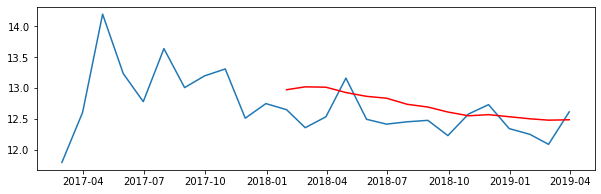

In [8]:
#Moving average 
#ploting the rolling on log 

movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.figure(figsize=(10, 3))
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

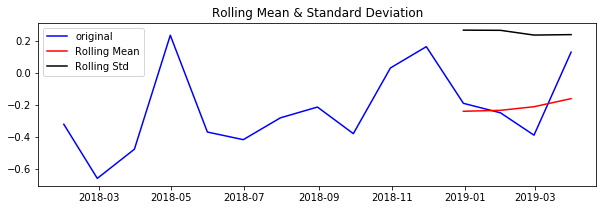

Result of Dickey Fuller Test
Test Statistic                 -3.117293
p-value                         0.025300
#Lags Used                      0.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [9]:
# Subtrate the data before before 11 month, since the rolling start from 12 
datasetLogScaleMinusMovingAverage=indexedDataset_logScale-movingAverage

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)

#test stationarity
test_stationarity(datasetLogScaleMinusMovingAverage)

## Eliminating Trend and Seasonality
Ways to remove the trend and seasonality

1.**Differencing** – taking the differece with a particular time lag

2.**Decomposition** – modeling both trend and seasonality and removing them from the model.


### Differencing
One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity.

### Decomposing
In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned


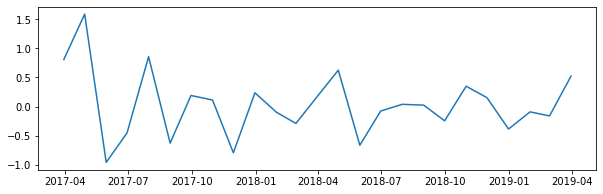

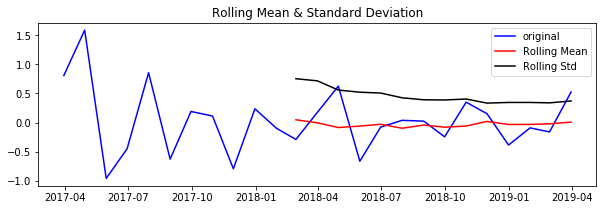

Result of Dickey Fuller Test
Test Statistic                 -1.913600
p-value                         0.325690
#Lags Used                      9.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [10]:
#Differencing
datasetLogDiffShifting=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.figure(figsize=(10, 3))
plt.plot(datasetLogDiffShifting)
datasetLogDiffShifting.dropna(inplace=True)

#test stationarity
test_stationarity(datasetLogDiffShifting)

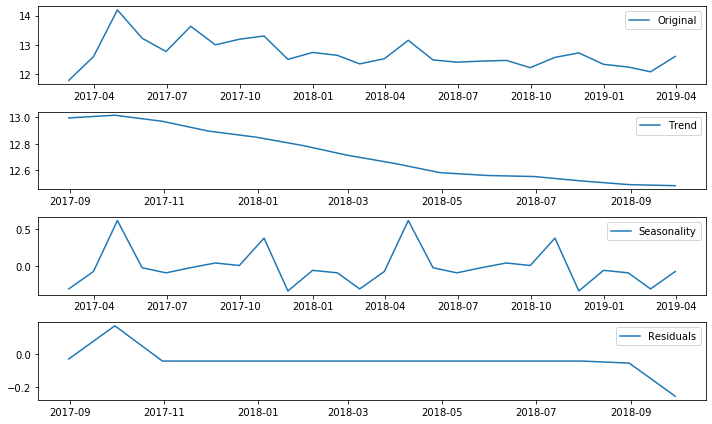

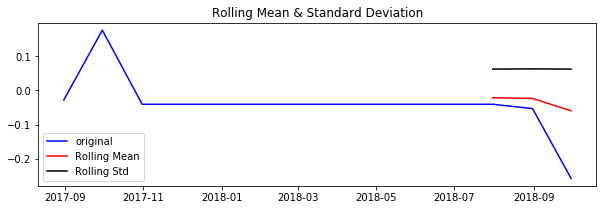

Result of Dickey Fuller Test
Test Statistic                 -1.580886
p-value                         0.493188
#Lags Used                      1.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [11]:
#Decomposition 
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

## ARIMA

ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

1.**Number of AR (Auto-Regressive) terms (p)**: AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

2.**Number of MA (Moving Average) terms (q)**: MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

3.**Number of Differences (d)**: These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.


### Use two plot to estimate the parameter p,q 

1.**Autocorrelation Function (ACF),paramter Q**: It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

2.**Partial Autocorrelation Function (PACF),parameter P**: This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

## ACF and PACF plot

Predictors depend on the parameters (p,d,q) of the ARIMA model:
* Take Autocorrelation Function (ACF) & Partial Autocorrelation Function (PACF) frist
* D is the order of different for example ,order 1 (d=1) is the first value and the second value differerent order 2 (d=2 ) is the first value and third value different [between them have a space of 2] normally Dmax is 2 
* p -- means the corellation value

C:\Users\Eric Yeoh Seng Ghee\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


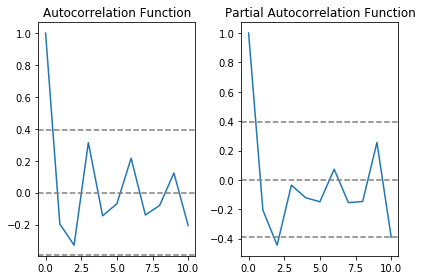

In [12]:


#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting, nlags=10)# p=input data can beanyone of the method shiftting , decompose
lag_pacf = pacf(datasetLogDiffShifting, nlags=10, method='ols')


#Plot ACF: identify parameter Q
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:identify paramter p
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. 

Text(0.5, 1.0, 'RSS: 6.2851')

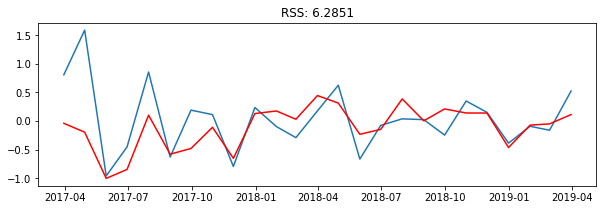

In [51]:
#Arima model
#indexedDataset_logScale is the model fit 

#AR Model tune back para
model=ARIMA(indexedDataset_logScale, order=(0, 1, 4))  
results_AR = model.fit() 
plt.figure(figsize=(10, 3))
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting)**2))


Text(0.5, 1.0, 'RSS: 6.6501')

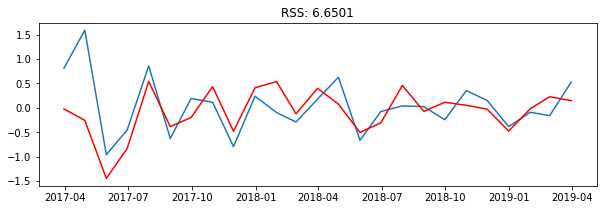

In [56]:
#MA Model reverse parameter to AR tune front para
model = ARIMA(indexedDataset_logScale, order=(4, 1, 0))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(10, 3))
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting)**2))

Text(0.5, 1.0, 'RSS: 6.5916')

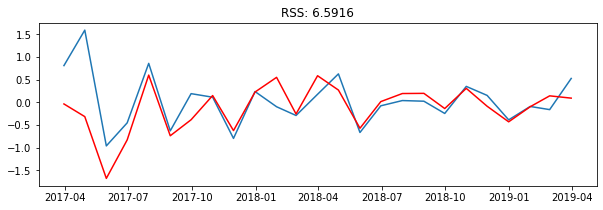

In [76]:
#Combine Model combine of the 2 paramter 
model = ARIMA(indexedDataset_logScale, order=(4, 1, 4))  
results_ARIMA = model.fit(disp=-1) 
plt.figure(figsize=(10, 3))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting)**2))

### Performance validation parameter

In [70]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Revenue ESG SnP   No. Observations:                   25
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -15.766
Method:                       css-mle   S.D. of innovations              0.429
Date:                Sat, 11 Apr 2020   AIC                             39.532
Time:                        14:30:12   BIC                             44.407
Sample:                    03-31-2017   HQIC                            40.884
                         - 03-31-2019                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0252      0.018     -1.411      0.172      -0.060       0.010
ma.L1.D.Revenue ESG SnP    -0.3382      0.228     -1.484      0.152      -0.785       0.108
ma.L2.D.Revenue ESG SnP    -0.6617      0.213     -3.103      0.005      -1.080      -0.244
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0001           +0.0000j            1.0001            0.0000
MA.2           -1.5112           +0.0000j            1.5112            0.5000
-----------------------------------------------------------------------------
"""

### Convert back to series

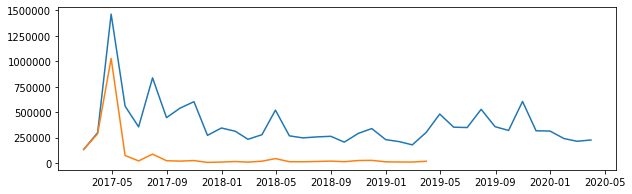

In [59]:
#covert it to series
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)#para is which mode ,moving average or decomposition

#covert to cumulative sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()

predictions_ARIMA_log=pd.Series(indexedDataset_logScale,index=indexedDataset_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

#covert back to ooriginal form using exponential , due to log input 
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.figure(figsize=(10, 3))
plt.plot(sg_revenue)
plt.plot(predictions_ARIMA)

### Prediction

### Result Evaluation

1.8350403650469325

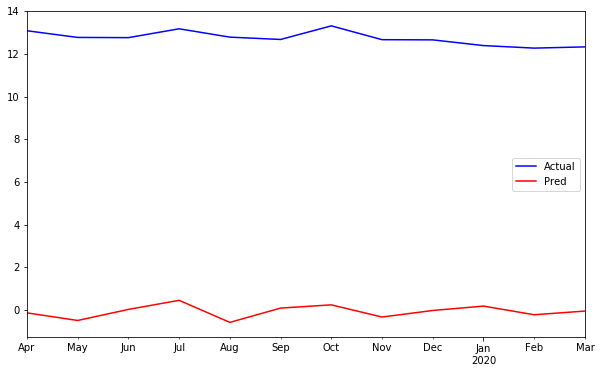

In [77]:
#Plot graph of prediction and actual 
arima_prediction=results_ARIMA .predict(start='2019-04-30',end='2020-03-31')
arima_forecast=results_ARIMA .forecast(steps=12)
#%%
act_arima=pd.DataFrame(indexedDataset_logScale_test)
predictions_arima=pd.DataFrame(arima_prediction)
predictions_arima['Actual']=act_arima['Revenue ESG SnP']
predictions_arima.rename(columns={0:'Pred'},inplace=True)
predictions_arima['Actual'].plot(figsize=(10,6), legend=True, color='blue')
predictions_arima['Pred'].plot(legend=True, color='red', figsize=(10,6))

#Evaluate the reusult
arima_error=np.sqrt(mean_squared_error(indexedDataset_logScale_test, x[0]))
arima_error

### Print in log form

### Print in original form

### To find the optimal parameter for ARIMA

In [37]:
import warnings
warnings.filterwarnings('ignore')

#tune the range 
for p in range(0,10):
    for q in range(0,5):
        order=(p,1,q)
        try:
            model = ARIMA(indexedDataset_logScale, order)  
            results_ARIMA = model.fit(disp=-1) 
            x=results_ARIMA.forecast(steps=12)
            pred_y=results_ARIMA.forecast(steps=12)
            error=np.sqrt(mean_squared_error(indexedDataset_logScale_test, pred_y[0]))
            print('ARIMA%s MSE= %.2f' %(order,error))
        except:
            continue
                


ARIMA(0, 1, 0) MSE= 0.41
ARIMA(0, 1, 1) MSE= 0.69
ARIMA(0, 1, 2) MSE= 0.57
ARIMA(0, 1, 3) MSE= 0.89
ARIMA(0, 1, 4) MSE= 0.86
ARIMA(0, 1, 5) MSE= 0.64
ARIMA(0, 1, 6) MSE= 0.86
ARIMA(0, 1, 7) MSE= 0.86
ARIMA(0, 1, 8) MSE= 0.86
ARIMA(0, 1, 9) MSE= 0.80
ARIMA(1, 1, 0) MSE= 0.38
ARIMA(2, 1, 0) MSE= 0.57
ARIMA(2, 1, 1) MSE= 0.80
ARIMA(2, 1, 2) MSE= 0.77
ARIMA(2, 1, 4) MSE= 0.72
ARIMA(3, 1, 0) MSE= 0.57
ARIMA(3, 1, 1) MSE= 0.75
ARIMA(3, 1, 2) MSE= 0.80
ARIMA(3, 1, 3) MSE= 0.74
ARIMA(3, 1, 4) MSE= 0.73
ARIMA(4, 1, 0) MSE= 0.59
ARIMA(4, 1, 1) MSE= 0.77
ARIMA(4, 1, 2) MSE= 0.76
ARIMA(4, 1, 3) MSE= 0.74
ARIMA(4, 1, 4) MSE= 0.74
ARIMA(5, 1, 0) MSE= 0.60
ARIMA(5, 1, 1) MSE= 0.75
ARIMA(5, 1, 2) MSE= 0.76
ARIMA(5, 1, 3) MSE= 0.74
ARIMA(5, 1, 4) MSE= 0.82
ARIMA(6, 1, 0) MSE= 0.59
ARIMA(6, 1, 1) MSE= 0.59
ARIMA(6, 1, 2) MSE= 0.76
ARIMA(6, 1, 3) MSE= 0.75
ARIMA(6, 1, 4) MSE= 0.84
ARIMA(6, 1, 6) MSE= 0.73
ARIMA(7, 1, 0) MSE= 0.65
ARIMA(7, 1, 1) MSE= 0.82
ARIMA(7, 1, 3) MSE= 0.75
ARIMA(7, 1, 4) MSE= 0.85


## SARIMA

SARIMA model is like ARIMA models but with a seasonal component. The hyperpameter of SARIMA(p,d,q)x(P,D,Q,s) :

* **p and seasonal P**: indicate number of autoregressive terms (lags of the stationarized series)
* **d and seasonal D**: indicate differencing that must be done to stationarize series
* **q and seasonal Q**: indicate number of moving average terms (lags of the forecast errors)
* **s**: indicates seasonal length in the data (s=4 here due to quatery)

SARIMAX parameter calculation 
d + D*s + max(3*q + 1, 3*Q*s + 1, p, P*s) + 1 observations to avoid some error

In [78]:
#Sarimax order
model = sm.tsa.statespace.SARIMAX(indexedDataset_logScale, order=(4, 1, 4),seasonal_order=(1, 0, 0, 4), enforce_stationarity=False, enforce_invertibility=False)  
results_SARIMAX = model.fit(max_iter=100,method='powell') 
results_SARIMAX.summary()

Optimization terminated successfully.
         Current function value: -0.165692
         Iterations: 18
         Function evaluations: 2007


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                   Revenue ESG SnP   No. Observations:                   26
Model:             SARIMAX(4, 1, 4)x(1, 0, 0, 4)   Log Likelihood                   4.308
Date:                           Sat, 11 Apr 2020   AIC                             11.384
Time:                                   14:32:32   BIC                             19.716
Sample:                               02-28-2017   HQIC                            12.212
                                    - 03-31-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2170      0.819      0.265      0.791      -1.387       1.821
ar.L2         -0.4789      0.221     -2.168      0.030      -0.912      -0.046
ar.L3          0.3141      0.269      1.167      0.243      -0.213       0.842
ar.L4         -0.4022      0.394     -1.020      0.308      -1.175       0.371
ma.L1         -1.0939   3844.730     -0.000      1.000   -7536.625    7534.438
ma.L2          0.3326    728.688      0.000      1.000   -1427.869    1428.534
ma.L3         -1.0945   1199.201     -0.001      0.999   -2351.484    2349.296
ma.L4          1.0002   4381.681      0.000      1.000   -8586.938    8588.938
ar.S.L4        0.5640      0.252      2.234      0.025       0.069       1.059
sigma2         0.0215     94.028      0.000      1.000    -184.271     184.313
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.94
Prob(Q):                               nan   Prob(JB):                         0.63
Heteroskedasticity (H):               0.65   Skew:                            -0.52
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
prediction=results_SARIMAX.predict(start='2019-04-30',end='2020-03-31')
sarimaxforecast=results_SARIMAX.forecast(steps=12)

0.493359569207991

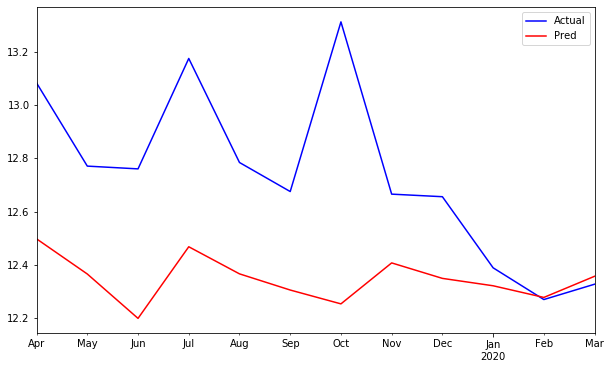

In [80]:
act=pd.DataFrame(indexedDataset_logScale_test)
predictions=pd.DataFrame(prediction)
predictions['Actual']=act['Revenue ESG SnP']
predictions.rename(columns={0:'Pred'},inplace=True)
predictions['Actual'].plot(figsize=(10,6), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(10,6))
sarimax_error=np.sqrt(mean_squared_error(predictions['Pred'],predictions['Actual']))
sarimax_error

In [64]:
#tune the range for sarimax
for P in range(0,7):
    for D in range(0,1):
        for Q in range(0,7):
            seasonal_order=(P,D,Q,4)
            try:
                model = sm.tsa.statespace.SARIMAX(indexedDataset_logScale, order=(4, 1, 4),seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)  
                results_SARIMAX = model.fit(max_iter=100,method='powell') 
                prediction=results_SARIMAX.predict(start='2019-04-30',end='2020-03-31')
                sarimaxforecast=results_SARIMAX.forecast(steps=12)
                act=pd.DataFrame(indexedDataset_logScale_test)
                predictions=pd.DataFrame(prediction)
                predictions['Actual']=act['Revenue ESG SnP']
                predictions.rename(columns={0:'Pred'},inplace=True)
                sarimax_error=np.sqrt(mean_squared_error(predictions['Pred'],predictions['Actual']))
                print('Sarimax%s MSE= %.2f' %(seasonal_order,sarimax_error))
            except:
                continue

Optimization terminated successfully.
         Current function value: -0.065791
         Iterations: 37
         Function evaluations: 3914
Sarimax(0, 0, 0, 4) MSE= 0.50
Optimization terminated successfully.
         Current function value: -0.165551
         Iterations: 17
         Function evaluations: 1993
Sarimax(0, 0, 1, 4) MSE= 0.45
Optimization terminated successfully.
         Current function value: 17.508219
         Iterations: 11
         Function evaluations: 1694
Sarimax(0, 0, 2, 4) MSE= 31208211106296997347328.00
Optimization terminated successfully.
         Current function value: -0.165692
         Iterations: 18
         Function evaluations: 2007
Sarimax(1, 0, 0, 4) MSE= 0.49
Optimization terminated successfully.
         Current function value: -0.296154
         Iterations: 17
         Function evaluations: 2152
Sarimax(1, 0, 1, 4) MSE= 0.53
Optimization terminated successfully.
         Current function value: -0.400320
         Iterations: 27
         Function 

## Reference 

1. A Complete Tutorial on Time Series Modeling in R 
(https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)

2. A comprehensive beginner’s guide to create a Time Series Forecast (with Codes in Python and R)
(https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)

3. An End-to-End Project on Time Series Analysis and Forecasting with Python
(https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b)

4. Time Series Analysis in Python | Time Series Forecasting | Data Science with Python | Edureka
(https://www.youtube.com/watch?v=e8Yw4alG16Q)

5. Significance of ACF and PACF Plots In Time Series Analysis
(https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8)

6. Time Series Analysis and Forecasting - Forecasting Sales in Python - ARIMA, AR, MA models theory
(https://www.youtube.com/watch?v=1KGcmLP65uo)

7. How To Backtest Machine Learning Models for Time Series Forecasting
(https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/)